In [22]:
import torch
from torch import nn
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sales = pd.read_csv('../cache/train/AA035409.csv')[:-3]
# , 'total'
cols = ['week', 'year', 'month', 'discount', 'dis', 'price', 'hao',
        'p', 'c', 'h', 'ahao', 'ap', 'ac', 'pv', 'uv', 'sc', 'jg', 'avgst',
        'se','WeeksAgoNum', 'twoWeeksAgoNum', 'threeWeeksAgoNum']
col = ['hao','p', 'c', 'h']

In [24]:
t_len = int(len(sales) * 0.8)
train_x = sales[:t_len][col]
train_y = sales[:t_len]['total']
test_x = sales[t_len:][col].copy()
test_y = sales[t_len:]['total']
org_test = sales[t_len:].copy()

In [25]:
poly_transformer = PolynomialFeatures(degree = 2)
poly_transformer.fit(train_x)
poly_features = poly_transformer.transform(train_x)
poly_features_test = poly_transformer.transform(test_x)

In [27]:
features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names(col))

In [32]:
k_fold = KFold(n_splits = 4, shuffle = True, random_state = 50)

In [37]:
for train_indices, valid_indices in k_fold.split(features):
    print(train_indices)
    print(valid_indices)    

[  0   1   2   4   5   6   7   8   9  10  11  13  15  17  18  19  22  24
  26  27  28  29  30  31  32  33  35  36  37  38  40  41  42  43  44  45
  46  47  49  50  51  52  53  57  58  60  61  62  63  64  65  66  67  69
  70  71  74  75  76  78  79  83  84  85  87  89  90  91  92  93  94  95
  96  99 101 102 103 104 105 106 107 108 109 110 111 114 115 116 117 120
 121 122 123 124 126 127 128 129 132 133 134 135 136 137 138 139 141 142
 145 146 148 149]
[  3  12  14  16  20  21  23  25  34  39  48  54  55  56  59  68  72  73
  77  80  81  82  86  88  97  98 100 112 113 118 119 125 130 131 140 143
 144 147]
[  0   1   2   3   6   9  10  11  12  13  14  16  19  20  21  22  23  24
  25  26  28  29  30  31  32  33  34  35  36  39  43  45  46  48  49  51
  52  54  55  56  58  59  60  61  62  64  66  67  68  70  71  72  73  76
  77  79  80  81  82  83  85  86  87  88  89  90  91  92  93  94  95  96
  97  98 100 101 105 106 108 109 110 111 112 113 115 118 119 120 121 123
 124 125 126 127 129 13

In [3]:
# train_x, valid_x, train_y, valid_y = train_test_split(sales[cols], sales[['total']], test_size=0.2, random_state=1)

In [4]:
x = torch.tensor(sales[cols].values,device=device, dtype=torch.float32)

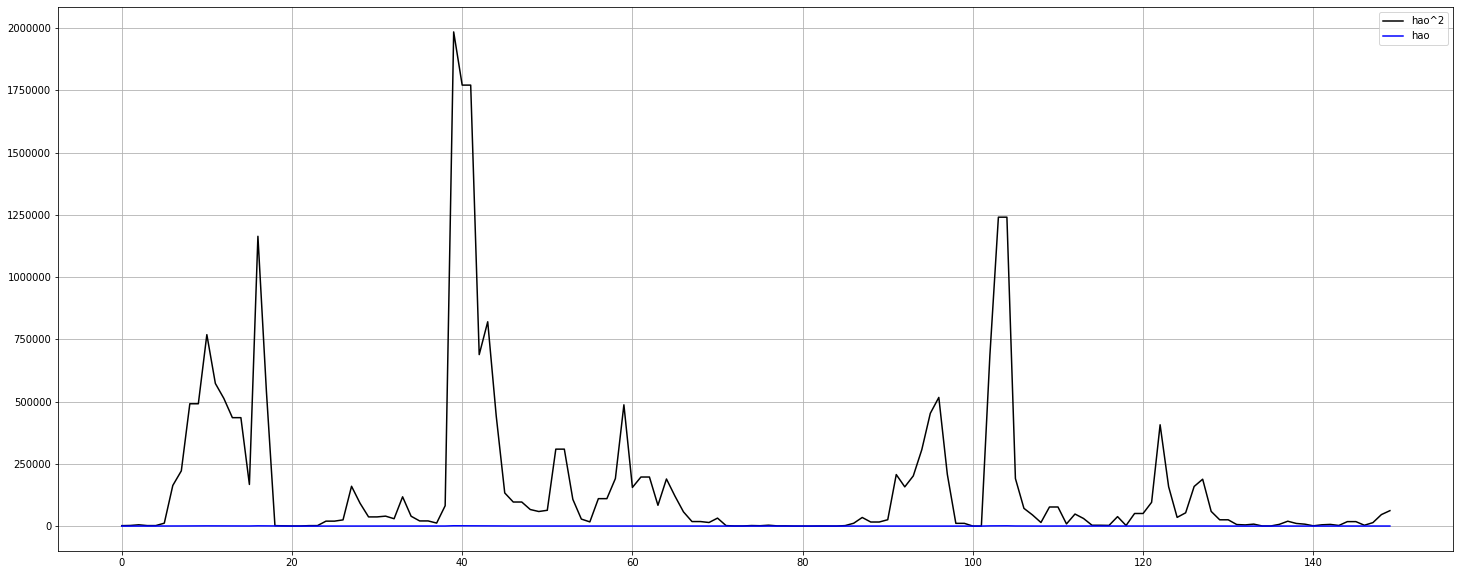

In [31]:
# plt.figure()
# features['hao^2'].plot(color='black', label='hao^2', figsize=(25, 10))
# features['hao'].plot(color='blue', label='hao', figsize=(25, 10))
# plt.legend(loc='best')  # 将样例显示出来
# plt.grid(True)
# plt.show()